In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [10]:
import sys
import types
import pandas as pd
#from botocore.client import Config
#import ibm_boto3

def _iter_(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share your notebook.
#client_5022edb052cb493da82d0f09840119df = ibm_boto3.client(service_name='s3',
 #   ibm_api_key_id='DMMNhzi-atYLYCQMpwLK7mxFvl-fRNLO3_JeYzYiBysy',
  #  ibm_auth_endpoint="https://iam.eu-gb.bluemix.net/oidc/token",
   # config=Config(signature_version='oauth'),
    #endpoint_url='https://s3.eu-geo.objectstorage.service.networklayer.com')

#body=client_5022ebd052cb493da82d0f09840119df.get_object(Bucket='batch2-donotdelete-pr-jqe78ba82u2s6i',key='diabetes.csv')['body']



# add missing_iter_method,so pandas accepts body as file-like object
#if not hasattr(body,"_iter_"): body._iter_=types.MethodType(_iter_,body)
dataset=pd.read_csv("diabetes.csv")
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [11]:
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None


In [37]:
X = dataset.iloc[:,:-1].values
Y = dataset.iloc[:,8].values

In [18]:
plt.style.use('fivethirtyeight')

In [20]:
dataset.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

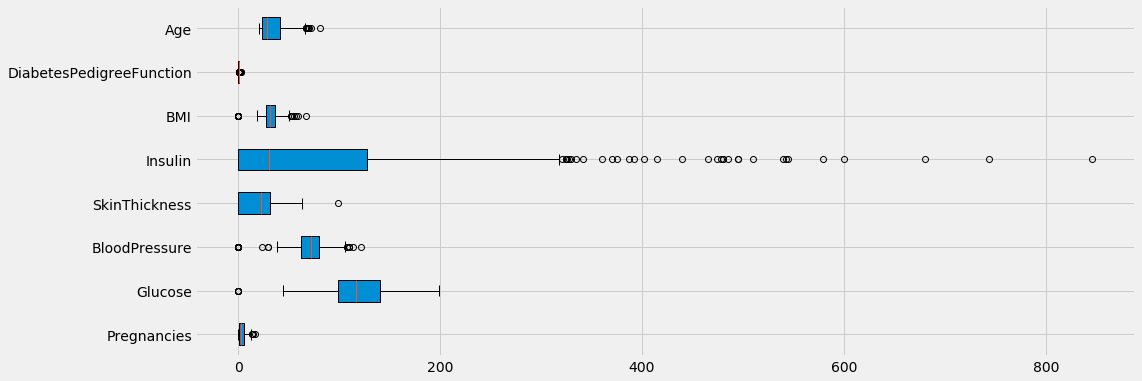

In [21]:
fig = plt.figure(figsize=(15,6))
plt.boxplot(X, vert = False,labels=['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI',
                                   'DiabetesPedigreeFunction', 'Age'], patch_artist=True)
plt.show()

In [22]:
corr = dataset.corr()

In [61]:
import seaborn as sns

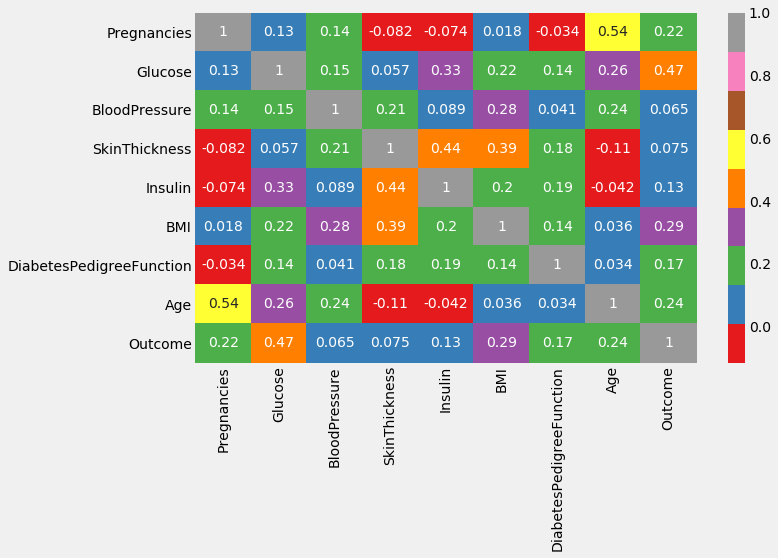

In [63]:
plt.figure(figsize = (10,6))
sns.heatmap(corr,annot = True,cmap = 'Set1')
plt.show()

In [25]:
from sklearn.preprocessing import MinMaxScaler

In [26]:
sc = MinMaxScaler(feature_range=(0,1))

In [27]:
X_new = sc.fit_transform(X)
X_new

array([[0.35294118, 0.74371859, 0.59016393, ..., 0.50074516, 0.23441503,
        0.48333333],
       [0.05882353, 0.42713568, 0.54098361, ..., 0.39642325, 0.11656704,
        0.16666667],
       [0.47058824, 0.91959799, 0.52459016, ..., 0.34724292, 0.25362938,
        0.18333333],
       ...,
       [0.29411765, 0.6080402 , 0.59016393, ..., 0.390462  , 0.07130658,
        0.15      ],
       [0.05882353, 0.63316583, 0.49180328, ..., 0.4485842 , 0.11571307,
        0.43333333],
       [0.05882353, 0.46733668, 0.57377049, ..., 0.45305514, 0.10119556,
        0.03333333]])

In [28]:
X_new[0]

array([0.35294118, 0.74371859, 0.59016393, 0.35353535, 0.        ,
       0.50074516, 0.23441503, 0.48333333])

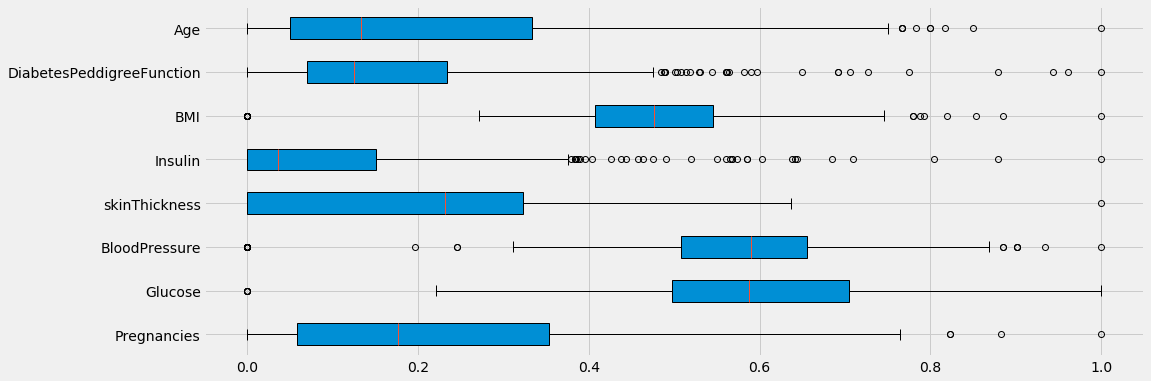

In [29]:
fig = plt.figure(figsize=(15,6))
plt.boxplot(X_new, vert = False,labels= ['Pregnancies','Glucose','BloodPressure','skinThickness','Insulin',
                                        'BMI', 'DiabetesPeddigreeFunction','Age'],patch_artist=True)
plt.show()

In [30]:
mx = sc.data_max_
mn = sc.data_min_

In [31]:
np.savez('scale.npz',mn,mx)

In [32]:
print(mx)
print(mn)

[ 17.   199.   122.    99.   846.    67.1    2.42  81.  ]
[ 0.     0.     0.     0.     0.     0.     0.078 21.   ]


In [67]:
from sklearn.cross_validation import train_test_split


In [40]:
x_train, x_test, y_train, y_test = train_test_split(X_new,Y,test_size = 0.2,random_state =0)

In [41]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((614, 8), (154, 8), (614,), (154,))

In [46]:
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [48]:
model_log = LogisticRegression(C = 10.0)
model_knn = KNeighborsClassifier(n_neighbors=3)
model_svm = SVC(C = 10.0,probability=True)
model_dt = DecisionTreeClassifier()
model_rf = RandomForestClassifier(n_estimators=100)
model_nb = MultinomialNB(alpha = 1)

In [49]:
model_log.fit(x_train, y_train)# training model
model_knn.fit(x_train, y_train)# training model
model_svm.fit(x_train, y_train)# training model
model_dt.fit(x_train, y_train)# training model
model_rf.fit(x_train, y_train)# training model
model_nb.fit(x_train, y_train)# training model

MultinomialNB(alpha=1, class_prior=None, fit_prior=True)

In [50]:
y_pred_log = model_log.predict(x_test) #we use this for evaluation
y_pred_knn = model_knn.predict(x_test) #we use this for evaluation
y_pred_svm = model_svm.predict(x_test) #we use this for evaluation
y_pred_dt = model_dt.predict(x_test) #we use this for evaluation
y_pred_rf = model_rf.predict(x_test) #we use this for evaluation
y_pred_nb = model_rf.predict(x_test) #we use this for evaluation

In [52]:
from sklearn.metrics import confusion_matrix, classification_report

In [53]:
cm_log = confusion_matrix(y_test, y_pred_log) # confusion matrix
cm_knn = confusion_matrix(y_test, y_pred_knn) # confusion matrix
cm_svm = confusion_matrix(y_test, y_pred_svm) # confusion matrix
cm_dt = confusion_matrix(y_test, y_pred_dt) # confusion matrix
cm_rf = confusion_matrix(y_test, y_pred_rf) # confusion matrix
cm_nb = confusion_matrix(y_test, y_pred_nb) # confusion matrix


cr_log = classification_report(y_test, y_pred_log) # classification report
cr_knn = classification_report(y_test, y_pred_knn) # classification report # classification report
cr_svm = classification_report(y_test, y_pred_svm) # classification report
cr_dt = classification_report(y_test, y_pred_dt) # classification report
cr_rf = classification_report(y_test, y_pred_rf) # classification report
cr_nb = classification_report(y_test, y_pred_nb) # classification report

In [65]:
import seaborn as sns

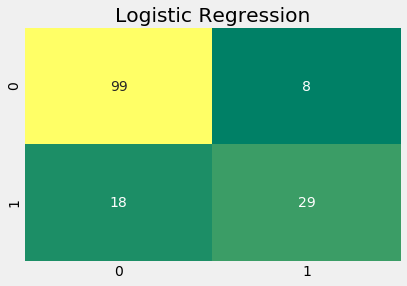

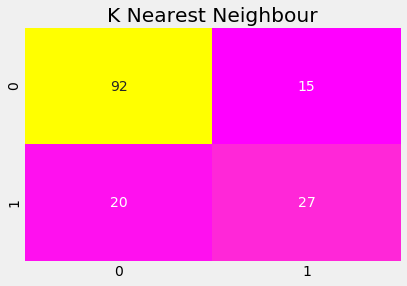

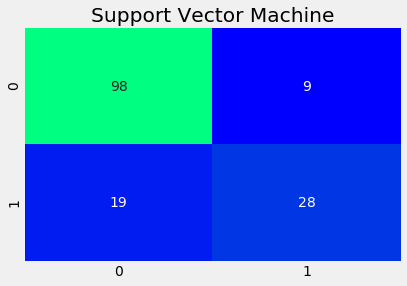

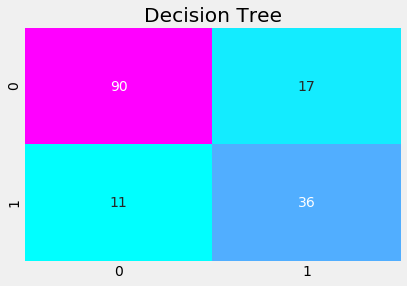

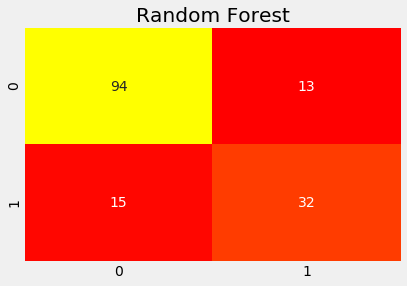

ValueError: Colormap set1 is not recognized. Possible values are: Accent, Accent_r, Blues, Blues_r, BrBG, BrBG_r, BuGn, BuGn_r, BuPu, BuPu_r, CMRmap, CMRmap_r, Dark2, Dark2_r, GnBu, GnBu_r, Greens, Greens_r, Greys, Greys_r, OrRd, OrRd_r, Oranges, Oranges_r, PRGn, PRGn_r, Paired, Paired_r, Pastel1, Pastel1_r, Pastel2, Pastel2_r, PiYG, PiYG_r, PuBu, PuBuGn, PuBuGn_r, PuBu_r, PuOr, PuOr_r, PuRd, PuRd_r, Purples, Purples_r, RdBu, RdBu_r, RdGy, RdGy_r, RdPu, RdPu_r, RdYlBu, RdYlBu_r, RdYlGn, RdYlGn_r, Reds, Reds_r, Set1, Set1_r, Set2, Set2_r, Set3, Set3_r, Spectral, Spectral_r, Wistia, Wistia_r, YlGn, YlGnBu, YlGnBu_r, YlGn_r, YlOrBr, YlOrBr_r, YlOrRd, YlOrRd_r, afmhot, afmhot_r, autumn, autumn_r, binary, binary_r, bone, bone_r, brg, brg_r, bwr, bwr_r, cividis, cividis_r, cool, cool_r, coolwarm, coolwarm_r, copper, copper_r, cubehelix, cubehelix_r, flag, flag_r, gist_earth, gist_earth_r, gist_gray, gist_gray_r, gist_heat, gist_heat_r, gist_ncar, gist_ncar_r, gist_rainbow, gist_rainbow_r, gist_stern, gist_stern_r, gist_yarg, gist_yarg_r, gnuplot, gnuplot2, gnuplot2_r, gnuplot_r, gray, gray_r, hot, hot_r, hsv, hsv_r, icefire, icefire_r, inferno, inferno_r, jet, jet_r, magma, magma_r, mako, mako_r, nipy_spectral, nipy_spectral_r, ocean, ocean_r, pink, pink_r, plasma, plasma_r, prism, prism_r, rainbow, rainbow_r, rocket, rocket_r, seismic, seismic_r, spring, spring_r, summer, summer_r, tab10, tab10_r, tab20, tab20_r, tab20b, tab20b_r, tab20c, tab20c_r, terrain, terrain_r, twilight, twilight_r, twilight_shifted, twilight_shifted_r, viridis, viridis_r, vlag, vlag_r, winter, winter_r

In [68]:
sns.heatmap(cm_log,annot=True,cbar=None,cmap = 'summer')
plt.title('Logistic Regression')
plt.show()
sns.heatmap(cm_knn,annot=True,cbar=None,cmap = 'spring')
plt.title('K Nearest Neighbour')
plt.show()
sns.heatmap(cm_svm,annot=True,cbar=None,cmap = 'winter')
plt.title('Support Vector Machine')
plt.show()
sns.heatmap(cm_dt,annot=True,cbar=None,cmap = 'cool')
plt.title('Decision Tree')
plt.show()
sns.heatmap(cm_rf,annot=True,cbar=None,cmap = 'autumn')
plt.title('Random Forest')
plt.show()
sns.heatmap(cm_nb,annot=True,cbar=None,cmap = 'set1')
plt.title('Multinomial Navie Bayes')
plt.show()

In [55]:
print('='*20+'Logistic Regression'+'='*20)
print(cr_log)
print('='*20+'KNearest Neighbour'+'='*20)
print(cr_knn)
print('='*20+'Support Vector Machine'+'='*20)
print(cr_svm)
print('='*20+'Decision Tree'+'='*20)
print(cr_dt)
print('='*20+'Random Forest'+'='*20)
print(cr_rf)
print('='*20+'Multinomial NB'+'='*20)
print(cr_nb)

====================Logistic Regression====================
             precision    recall  f1-score   support

          0       0.85      0.93      0.88       107
          1       0.78      0.62      0.69        47

avg / total       0.83      0.83      0.82       154

====================KNearest Neighbour====================
             precision    recall  f1-score   support

          0       0.82      0.86      0.84       107
          1       0.64      0.57      0.61        47

avg / total       0.77      0.77      0.77       154

====================Support Vector Machine====================
             precision    recall  f1-score   support

          0       0.84      0.92      0.88       107
          1       0.76      0.60      0.67        47

avg / total       0.81      0.82      0.81       154

====================Decision Tree====================
             precision    recall  f1-score   support

          0       0.89      0.84      0.87       107
          1 